# Quantum Computing Key Concepts 

- #### Hands-on Experiential Learning <font color="red">for the Software Engineer</font>


![qc-banner](img/qc-banner1.png "qc-banner")

<font color="red">**Notice**</font>: All materials herein were <font color="red">**curated**</font> by **Matthew R. Versaggi (profversaggi@gmail.com)** and are released into the open source to foster growth and welfare of expanding the Quantum Computing domain - the only obligation one incurs when using, copying, distributing or referencing this is to kindly reference the author and send me an email so I know how useful the material is to you.

<font color="red">**Notice**</font>: Python Code contributions for the Circle Plots are the work of **David Radcliffe**.

## Pedagogical Approach: (<font color="red">**Read this first !**</font>)

This material is intended to educate **software engineers** in certain aspects of Quantum Computing, therefore its focus will be on conveying the conceptual ideas in a form digestible to them, and supporting it with exercises to reinforce those concepts. 

Because of that pedagogical approach, **this material won't lead with or heavily leverage the concepts and language indigenous to physics and math**, but only in those terms most easily digestible to the modern software engineer.

This Jupyter Notebook is <font color="red">**not intended as a stand alone educational vehicle**</font>  - it's meant to be accompanied by a decicated power point deck that contains the main concepts to be presented by an instructor - **it is intended as a vehicle for a hands on workshop environment to facilitate learning through a guided experience.**

> **Note:-** Because of the above educational approach:
1. There is a certain amount of basic Quantum Computing knowledge that is assumed.
2. An active internet connection is **always** assumed.
3. Online references/links will be provided where appropriate
4. References to books will be made where appropriate
5. Much of this material is **dense and detailed**, the reader is <font color="red">**cautioned**</font> to be careful and slow to digest the *nuances* of the material.

## What you will be exposed to - High level: 


- Software engineers in the Quantum Computing space need to know their way around important concepts in this space - that means developing intuition and proficiencies around: quantum waves, interference, superposition, entanglement and teleportation. 
- Given the above, there are a host of technical concepts that need to be **<font color="red">understood experientially</font>**, therefore we'll intentionally employ a vendor / framework agnostic approach to focus on the delivery of concept understanding and intuition procurement as the main value-add.

> ### High Level Agenda (<font color="red">*major sections*</font>): - key concepts for the quantum software engineer.
1. Quantum <font color="blue">*Waves*</font>
2. Quantum <font color="blue">*Interference*</font>
3. Quantum <font color="blue">*Superposition*</font>
>> 0. <font color="red">Exercise</font>: Creating a Perfectly Random Quantum Bit : Qubit
>>> 0. Using the **QCEngine** to Explore a "Perfectly Random Quantum Bit"
>>> 0. Using **QUIRK** to Explore a "Perfectly Random Quantum Bit"
>>> 0. Using **Qiskit** to Explore a "Perfectly Random Quantum Bit".
>> 0. <font color="red">Exercise</font>: Creating a Perfectly Random Quantum Byte : QuByte¶
>>> 0. Using **QCEngine** to Explore a "Perfectly Random Quantum Byte".
>>> 0. Using **QUIRK** to Explore a "Perfectly Random Quantum Byte"
>>> 0. Using **Qiskit** to Explore a "Perfectly Random Quantum Byte".
4. Quantum <font color="blue">*Entanglement*</font>
>> 0. <font color="red">Exercise</font>: Using **QUIRK** to explore two entangled qubits
>> 0. <font color="red">Exercise</font>: Using **QUIRK** to explore multiple entangled qubits
>> 0. <font color="red">Exercise</font>: Using **QCEngine** to explore two Entangled Qubits
>> 0. <font color="red">Exercise</font>: Using **Qiskit** to explore two Entangled Qubits
5. Quantum <font color="blue">*Teleportation*</font>
>> 0. <font color="blue">Developmental Detour</font>:- **QCEngine** Teleportation Program WalkThrough
>> 0. <font color="red">Exercise</font>: Using **QCEngine** to Explore Quantum Teleportation
>> 0. <font color="red">Exercise</font>: Using **QUIRK** to Explore Quantum Teleportation
>> 0. <font color="red">Exercise</font>: Using **QISKIT** to Explore Quantum Teleportation


## Background Videos: 

Quantum Computing Concepts - **Series**

- https://www.youtube.com/watch?v=sjINVV2xOow&list=PLHSIfioizVW2uC27IFkHlSc-NgvZjBliZ

# Developmental Detour : -  <font color="blue">Quantum Waves</font>

<BR>

![wavefunction](img/wavefunction.png "wavefunction")

## The Wave Function

> The **Wave Function** is central to Quantum Computing so there is a need to grasp it conceptually.
- **<font color="red">However</font>**, the term <font color="blue">**“wave”**</font> is used in quantum physics **only used as an analogy** to the classical waves that we see in everyday life; quantum waves are **<font color="red">not</font>** at all the same thing as everyday waves.

#### Difference between a classical wave and a quantum wave : <font color="red">Interference</font>.

> The below animation illustrates the **key difference** between quantum waves and classical types - **"Interference"**.

> Comparison of classical and quantum harmonic oscillator conceptions. **The two processes differ greatly.** 

- The classical process (A–B) is represented as the motion of a particle along a trajectory. The quantum process (C–H) has no such trajectory. Rather, it is represented as a wave; here, the vertical axis shows the **real part** (<font color="blue">**blue**</font>) and **imaginary part** (<font color="red">**red**</font>) of the wave function. Panels (C–F) show four different **standing-wave** solutions of the Schrödinger equation. **Panels (G–H)** further show two different wave functions that are solutions of the **Schrödinger equation** but not standing waves.


- https://en.wikipedia.org/wiki/Wave_function


<table><tr><td><img src='img/QuantumHarmonicOscillatorAnimation.gif'></td><td><img src='img/wave-interference.png'></td></tr></table>


> **<font color="red">Note:</font>** - Wave **Interference** can be either **Constructive** or **Destructive**.

### Explore waves using the Phet Interactive Wave Simulator

In [1]:
from IPython.display import IFrame
IFrame(src='https://phet.colorado.edu/sims/html/waves-intro/latest/waves-intro_en.html', width=900, height=900)

# Developmental Detour : -  <font color="blue">Quantum Interference</font>

<BR>

![interference-fisherman](img/interference-fishermen.png "interference-fisherman")

<BR>
    
![interference-animated](img/interference-animated.gif "interference-animated")    
    
<BR>    
    
<table><tr><td><img src='img/wave-interference.png'></td></tr></table>


> A fundamental idea in quantum computing is to **control** the probability a system of qubits collapses into particular measurement states. **Quantum interference**, a byproduct of superposition, is what allows us to **bias** the measurement of a qubit **toward a desired state or set of states**.

### Explore Interference using the Phet Interactive Wave Simulator

In [1]:
from IPython.display import IFrame
IFrame(src='https://phet.colorado.edu/sims/html/wave-interference/latest/wave-interference_en.html', width=900, height=900)

# <font color="red">Exercise</font> - Quantum Interference : <font color="blue"> Simons Algorithm with QUIRK</font> 



### Commentary:
- Interference is difficult to observe directly even in the simulators, so we have to examine it's effects on circuits in instances where it's known to occur and then use a "before-after" scenario.

> In the implementation of Simon's algorithm below for the function **f(x)=f(x⊕s), s=11** one can <font color="red">*see the interference after the application of the 2nd Hadamard gate*</font>. 
- **Initially**, all basis states are *equally likely*, **then** *inteference kicks in with the Hadamard*, and you end up with only **|00>** or **|11>**.

<BR>

### BEFORE Interference

![InterferenceSimonAlgorithm-Before](img/InterferenceSimonAlgorithm-Before.png "InterferenceSimonAlgorithm-Before")

<BR>

### AFTER Interference

![InterferenceSimonAlgorithm-After](img/InterferenceSimonAlgorithm-After.png "InterferenceSimonAlgorithm-After")


### INSTRUCTIONS:

> Experiment removing and adding back the 2nd H Gate to gain intuition as to the behavior of the Quantum Interference.

In [2]:
# QUIRK (Quantum Circuit Simulator)
from IPython.display import IFrame
IFrame(src='https://algassert.com/quirk#circuit={%22cols%22:[[%22H%22,%22H%22],[%22%E2%80%A2%22,1,%22X%22],[%22%E2%80%A2%22,1,1,%22X%22],[1,%22%E2%80%A2%22,%22X%22],[1,%22%E2%80%A2%22,1,%22X%22],[1,1,%22Measure%22,%22Measure%22],[%22Chance2%22],[%22H%22,%22H%22],[%22Chance2%22],[%22Measure%22],[1,%22Measure%22]]}', width=900, height=600)

# Developmental Detour : -  <font color="blue">Quantum Superposition</font>
- #### **<font color="red">Quantum Superposition is truly random</font>** .

<BR>
    
![superposition](img/superposition.png "superposition")

<BR>
    
> **SUPERPOSITION:** -The qubit is a unit of quantum information. As a **two-state system with superposition of both states at the <font color="red">same</font> time**, it is fundamental to quantum computing. 

    
> **<font color="red">Note:</font>** 
- **One **<font color="blue">Bit</font>**** can represent **two** different values, **“0”** and **“1”**.
- **One **<font color="blue">Qubit</font>**, unlike a bit, can take on an **<font color="red">infinite</font>** number of values. Physicists call these the **<font color="red">states</font>** of the qubit.


> The Qubit (aka "Quantum Bit") has binary **"On" (1)** and **"Off" (0)** just like a digital bit, but it also has carries aspects of state zero and state one simultaneously (a quantum "thing") when it is in **"superposition"**.

<BR>

![Quantum_Bit_Diagram](img/Quantum_Bit_Diagram.png "Quantum_Bit_Diagram")

<BR>
    
> Superposition is represented by any position of the Bloch Sphere that isn't definitively (0 or 1), aka **any point on the surface** of the sphere.
    
![Quantum_SuperpositionDiagram](img/Quantum_SuperpositionDiagram.png "Quantum_SuperpositionDiagram")


<BR>
    
> Superposition results in a **perfectly random** bit after **"measurement"**.
    
![Quantum_Superposition_50-50](img/Quantum_Superposition_50-50.png "Quantum_Superposition_50-50")


<BR>


>  A <font color="red">Single</font> Qubit can represent <font color="red"> 2<sup>N</sup> </font> components in <font color="red">one</font> state.
    
    
**Q: How can a Qubit be in two states at once?**

https://www.quora.com/How-can-a-qubit-hold-0-and-1-at-same-time

**A:** Because it's underlying mathematical circuitry is vectors, and in superposition, any point on the curve is a function of the **|0>** and the **|1>** ket vectors. The Qubit stores **Zero** and **One** state information <font color="red">at the same time </font> and quantum gates (matricies) executed against that qubit manipulate those underlying vectors. 

    
<BR>
    
    
![Quantum-2NStates](img/Quantum-2NStates.png "Quantum-2NStates")


<BR>

> Three Qubits can represent **<font color="red"> 2<sup>3</sup> </font>** components in parrell and can also leverage **"Quantum Interference"** for massive computational power.

<BR>
    
![Quantum_Parrallellisn-Interference](img/Quantum_Parrallellisn-Interference.png "Quantum_Parrallellisn-Interference")
    

<BR>

## <font color="red">Exercise:</font> Creating a Perfectly Random Quantum Bit : Qubit
- Quantum Randomness is TRULY random, whereas random number generators, while funtionally random, theoretically are not.

![One Random Bit](img/random_bit.png "One Random Bit")



## <font color="red">Exercise:</font> Using the **<font color="blue">QCEngine</font>** to Explore a "Perfectly Random Quantum Bit".
- Execute the code and interrogate the circuit while inspecting it's behavior via the circle plots.
- Try running the code multiple times, what happens?


In [4]:
from IPython.display import IFrame
IFrame(src='https://oreilly-qc.github.io?p=2-1', width=900, height=900)

## <font color="red">Exercise:</font> Using **<font color="blue">QUIRK</font>** to Explore a "Perfectly Random Quantum Bit".
- Visually inspect the behavior of the Bloch Sphere.
- Notice the behavior of the Amplitudes (Magnitudes and Phases) changes.

In [5]:
# QUIRK (Quantum Curcuit Simulator) 
from IPython.display import IFrame
IFrame(src='https://algassert.com/quirk#circuit={%22cols%22:[[%22H%22],[%22%E2%80%A6%22],[%22~87lj%22],[%22Bloch%22],[%22Density%22],[%22%E2%80%A6%22]],%22gates%22:[{%22id%22:%22~87lj%22,%22name%22:%22message%22,%22circuit%22:{%22cols%22:[[%22e^-iYt%22],[%22X^t%22]]}},{%22id%22:%22~f7c0%22,%22name%22:%22received%22,%22matrix%22:%22{{1,0},{0,1}}%22}]}', width=900, height=600)

## <font color="red">Exercise:</font> Using **<font color="blue">Qiskit</font>** to Explore a "Perfectly Random Quantum Bit".
- Run this program multiple times to develop intuition as to the behavior of the circuit using the Circle Plots.

### Setup the Program

counts: {'0': 1}
Output State:  [1.+0.j 0.+0.j]
Display State 1.0  |1>   


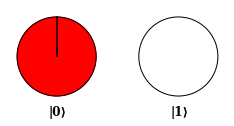

In [44]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
import math
import matplotlib.pyplot as P
import matplotlib.pyplot as plt
from Our_Qiskit_Functions import *
import cmath


## Uncomment the next line to see diagrams when running in a notebook
%matplotlib inline


# Helper Funtion for Normalizing State Vectors
#
def normalize_state_Vector(state_vector):
    for result in state_vector:
        print("Normalized Result: " , round( np.abs(result)**2, 1) )
        
        
# Helper Funtion for print Polar Phase(s)
#      
def plot_polar(state_vector):
    pi_radians = 180;
    for x in state_vector:
        plt.polar([0,cmath.phase(x)],[0,abs(x)],marker='o')
        print("The original complex number Re{%d}, Im{%d}, and Length : %f" % (x.real, x.imag, abs(x)))
        print("Phase: ",cmath.phase(x))
        if cmath.phase(x) != 0:
            print("Angle: ", pi_radians/(np.pi/cmath.phase(x)))


## Example 2-1: Random bit
# Set up the program
reg = QuantumRegister(1, name='reg')
reg_c = ClassicalRegister(1, name='regc')
qc = QuantumCircuit(reg, reg_c)

qc.reset(reg)          # write the value 0
qc.h(reg)              # put it into a superposition of 0 and 1
qc.measure(reg, reg_c) # read the result as a digital bit

backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

counts = result.get_counts(qc)
print('counts:',counts)

outputstate = result.get_statevector(qc, decimals=3)
print("Output State: ", outputstate)
print("Display State", Wavefunction(qc))


qc.draw(output='mpl')        # draw the circuit

# Print out Circle Notation

from circle_plot import *
plot_circles(outputstate)


### Polar Plots
- How does this plot change if the Qubit is ZERO or ONE?

The original complex number Re{0}, Im{0}, and Length : 0.000000
Phase:  0.0
The original complex number Re{1}, Im{0}, and Length : 1.000000
Phase:  0.0


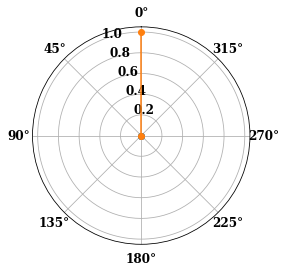

In [24]:
# Plot Polar Coordinates for intuitions sake - provides an idea of the angle of the plot on the curve  
# Plot both vectors and phase / angle (if non-zero)

P.clf()
sp = P.subplot(1, 1, 1, projection='polar')
sp.set_theta_zero_location('N')
sp.set_theta_direction(1)

plot_polar(outputstate)

## <font color="red">Exercise:</font> Creating a Perfectly Random Quantum Byte : QuByte
- Explore the power of Exponential Growth of states when an additional Qubit is added.

<BR>

![One Random Byte](img/random_byte.png "One Random Byte")


## <font color="blue">Discussion</font>:

> *The true power of quantum computing only becomes evident* as we **increase the number of qubits**. This power arises, in part, because the **dimension** of the vector space of quantum state vectors **grows exponentially** with the number of qubits.

> **<font color="red">Every time we add a qubit to a quantum system the state space</font> <font color="blue">doubles</font> in dimension** - this is because we *multiply the dimension of the original system’s state space by 2 when the new qubit is added*. 
- A **3-qubit** quantum system has a state space of **dimension of eight (8) : 2<sup>3</sup>**. 
- An **n-qubit** system’s state space has **<font color="red"> 2<sup>N</sup> </font>** dimensions.



## <font color="red">Exercise:</font> Using **<font color="blue">QCEngine</font>** to Explore a "Perfectly Random Quantum Byte".

> - Run the code multiple times and inspect the circuit diagram and the output panes.

- **QCEngine:** https://oreilly-qc.github.io
- **Docs:** https://oreilly-qc.github.io/docs/build/
- **Book:** https://www.amazon.com/Programming-Quantum-Computers-Essential-Algorithms/dp/1492039683

In [45]:
from IPython.display import IFrame
IFrame(src='https://oreilly-qc.github.io?p=2-2', width=900, height=900)

> **<font color="red">Reminder:</font>** 
- **One **<font color="blue">Qubit</font>****, unlike a bit, can take on an **<font color="red">infinite</font>** number of values. Physicists call these the **<font color="red">states</font>** of the qubit.


- These Qubits of the below circuit are **<font color="red">not</font>** entangled.

## <font color="red">Exercise:</font> Using **<font color="blue">QUIRK</font>** to Explore a "Perfectly Random Quantum Byte".


### Review of Quantum Parallelism (Multiple Qubits): The Qu<font color="red">Byte</font> (aka - 8 Qu<font color="red">Bits</font>)
- **Visual Representation of the Exponetial Number of States** qubits can hold.
- Pay attention to the **number of states that get represented** just by the process of **adding one more qubit**.
- **Note:** These are **non-entangled** Qubits

> **Observe**: - **<font color="red"> 2<sup>8</sup> </font>** is **<font color="blue">256</font>** States - which are all represented below - with just **<font color="red">eight</font>** qubits.

In [7]:
# QUIRK (Quantum Curcuit Simulator) of the Random QuByte
from IPython.display import IFrame
IFrame(src='https://algassert.com/quirk#circuit={%22cols%22:[[%22H%22,%22H%22,%22H%22,%22H%22,%22H%22,%22H%22,%22H%22,%22H%22],[%22%E2%80%A6%22,%22%E2%80%A6%22,%22%E2%80%A6%22,%22%E2%80%A6%22,%22%E2%80%A6%22,%22%E2%80%A6%22,%22%E2%80%A6%22,%22%E2%80%A6%22],[%22~87lj%22,%22~87lj%22,%22~87lj%22,%22~87lj%22,%22~87lj%22,%22~87lj%22,%22~87lj%22,%22~87lj%22],[%22Bloch%22,%22Bloch%22,%22Bloch%22,%22Bloch%22,%22Bloch%22,%22Bloch%22,%22Bloch%22,%22Bloch%22],[%22Density%22,%22Density%22,%22Density%22,%22Density%22,%22Density%22,%22Density%22,%22Density%22,%22Density%22],[%22%E2%80%A6%22,%22%E2%80%A6%22,%22%E2%80%A6%22,%22%E2%80%A6%22,%22%E2%80%A6%22,%22%E2%80%A6%22,%22%E2%80%A6%22,%22%E2%80%A6%22]],%22gates%22:[{%22id%22:%22~87lj%22,%22name%22:%22message%22,%22circuit%22:{%22cols%22:[[%22e^-iYt%22],[%22X^t%22]]}},{%22id%22:%22~f7c0%22,%22name%22:%22received%22,%22matrix%22:%22{{1,0},{0,1}}%22}]}', width=900, height=900)

## <font color="red">Exercise:</font> Using **<font color="blue">Qiskit</font>** to Explore a "Perfectly Random Quantum Byte".

### Setup and run the program
- Run the code multiple times.

Binary Number:  01100100
Random number: 100


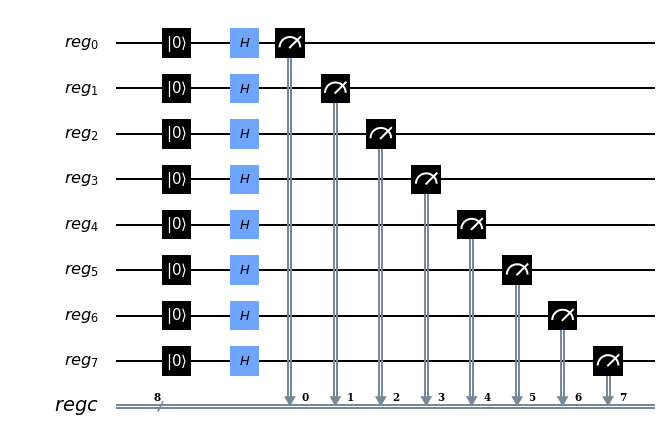

In [50]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
import math
import matplotlib.pyplot as P
import matplotlib.pyplot as plt
from Our_Qiskit_Functions import *
import cmath


## Uncomment the next line to see diagrams when running in a notebook
%matplotlib inline


# Helper Funtion for Normalizing State Vectors
#
def normalize_state_Vector(state_vector):
    for result in state_vector:
        print("Normalized Result: " , round( np.abs(result)**2, 1) )
        
        
# Helper Funtion for print Polar Phase(s)
#      
def plot_polar(state_vector):
    pi_radians = 180;
    for x in state_vector:
        plt.polar([0,cmath.phase(x)],[0,abs(x)],marker='o')
        print("The original complex number Re{%d}, Im{%d}, and Length : %f" % (x.real, x.imag, abs(x)))
        print("Phase: ",cmath.phase(x))
        if cmath.phase(x) != 0:
            print("Angle: ", pi_radians/(np.pi/cmath.phase(x)))
            
            

## Example 2-2: Random byte
# Set up the program
reg = QuantumRegister(8, name='reg')
reg_c = ClassicalRegister(8, name='regc')
qc = QuantumCircuit(reg, reg_c)

qc.reset(reg)          # write the value 0
qc.h(reg)              # put it into a superposition of 0 and 1
qc.measure(reg, reg_c) # read the result as a digital bit

backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()
outputstate = result.get_statevector(qc, decimals=3)


# Convert the result into a random number
counts = result.get_counts(qc)
# print('Binary Number and count:',counts)

for k in counts:
    binary_number = ''.join(reversed(k))
    print("Binary Number: ", binary_number)
    
for key,val in counts.items():
    n = sum([(int(x) << i) for i,x in enumerate(key)])
    print('Random number:', n)

qc.draw(output='mpl')        # draw the circuit


### Verify the Binary to Decimal conversions here:
- https://www.rapidtables.com/convert/number/binary-to-decimal.html

# Developmental Detour : -  <font color="blue">Quantum Entanglement</font>

- **<font color="red">Definition:</font>** *Quantum entanglement is a quantum mechanical phenomenon* in which **the quantum states of two or more objects have to be described with reference to each other (aka - a <font color="red">shared</font> state amoung them)**, even though the individual objects may be spatially separated.


- Reasonable Metaphor: **Marriage**. What affects one qubit, affects the other in the **opposite manner** after "measurement".


- The entangled quantum (shared) states **grow exponentially with the number of qubits added** to the system.

- **Gaining access** to these entangled quantum states is the **key to exploiting** the exponential large computational power of quantum systems.


- Quantum entanglement has applications in the emerging technologies of quantum computing and quantum cryptography, and has been used to realize quantum teleportation experimentally.

<BR>
    
    
#### Definition:    
- https://www.sciencedaily.com/terms/quantum_entanglement.htm

<BR>

![Quantum Entanglement](img/entanglement.png "Quantum Entanglement")

<BR>
    
    
### Background Videos:

#### UNSW: Quantum Computing Concepts – Entanglement Video:
- https://www.youtube.com/watch?v=EjdIMBOWCWo&list=PLHSIfioizVW2uC27IFkHlSc-NgvZjBliZ&index=6

#### Quantum Entanglement & Spooky Action at a Distance - Video:
- https://www.youtube.com/watch?v=ZuvK-od647c




> **<font color="red">Note:</font>** Entanglement gives Qunatum Computing the ability to scale **exponentially** - and along with *superposition* and *interference*, is a **key differentiator** in quantum computing.

- If one qubit simultaneously represents two states, two qubits represents four states when coupled together (entangled). **They can no longer be treated independently**, they now form a coupled (or entangled) super state.


- As more qubits link together, the number of states **exponentially increases** - which leads to *astronomically large computing power*.


## <font color="red">Exercise:</font> Using **<font color="blue">QUIRK</font>** to explore **<font color="red">two</font>** entangled qubits


### Move the "message gate" up and down each qubit wire 
- **<font color="red">Observe</font>** how the activity propagates through out the entirety of the entangled circuit
- **<font color="red">Notice</font>** the Bloch spheres have **"given up"** because the qubits are entangled and can no longer **describe their states independently** - *Instead look at the amplitude display to see the state of the full system*. 
- **Move** the message gate to both qubits and **observe** that changes to one affect the other (*as they are entangled*).
- **Move** the message gate to the LHS of both qubits and **observe** that changes to one affect the other (*as they are entangled*).

In [8]:
# QUIRK (Quantum Curcuit Simulator) 
from IPython.display import IFrame
IFrame(src='https://algassert.com/quirk#circuit={%22cols%22:[[%22H%22],[%22%E2%80%A2%22,%22X%22],[%22~87lj%22],[%22Bloch%22,%22Bloch%22],[%22Chance2%22],[%22Density2%22],[],[%22Measure%22,%22Measure%22]],%22gates%22:[{%22id%22:%22~87lj%22,%22name%22:%22message%22,%22circuit%22:{%22cols%22:[[%22e^-iYt%22],[%22X^t%22]]}},{%22id%22:%22~f7c0%22,%22name%22:%22received%22,%22matrix%22:%22{{1,0},{0,1}}%22}]}', width=900, height=600)

## <font color="red">Exercise:</font> Using **<font color="blue">QUIRK</font>** to explore **<font color="red">multiple</font>** entangled qubits
- **<font color="red">Observe</font>** how the activity propagates through out the entirety of the entangled circuit
- **<font color="red">Notice</font>** the Bloch spheres have "given up" because the qubits are entangled and can no longer **describe their states independently** - Instead look at the amplitude display to see the state of the full system. 

In [9]:
# QUIRK (Quantum Curcuit Simulator) 
from IPython.display import IFrame
IFrame(src='https://algassert.com/quirk#circuit={%22cols%22:[[%22H%22],[%22%E2%80%A2%22,%22X%22],[1,%22%E2%80%A2%22,%22X%22],[1,1,%22%E2%80%A2%22,%22X%22],[%22~87lj%22],[%22Bloch%22,%22Bloch%22,%22Bloch%22,%22Bloch%22],[%22Chance4%22],[%22Density4%22],[],[],[],[%22Measure%22,%22Measure%22,%22Measure%22,%22Measure%22]],%22gates%22:[{%22id%22:%22~87lj%22,%22name%22:%22message%22,%22circuit%22:{%22cols%22:[[%22e^-iYt%22],[%22X^t%22]]}},{%22id%22:%22~f7c0%22,%22name%22:%22received%22,%22matrix%22:%22{{1,0},{0,1}}%22}]}', width=900, height=700)

## <font color="red">Exercise:</font>  Using **<font color="blue">QCEngine</font>** to explore **<font color="red">two</font>** Entangled Qubits

> **<font color="red">NOTICE</font>** - what happens to one qubit also happens to the "entangled" qubit(s) as well.
- Run and re-run the program and observe the different results. **What happens when one qubit changes?**

<BR><BR>

![Quantum Entanglement Circuit](img/bells_pair.png "Quantum Entanglement Circuit")

In [10]:
# QUIRK (Quantum Curcuit Simulator) 
from IPython.display import IFrame
IFrame(src='https://oreilly-qc.github.io?p=3-2', width=900, height=600)

## <font color="red">Exercise:</font> Using **<font color="blue">Qiskit</font>** to explore **<font color="red">two</font>** Entangled Qubits

> **NOTICE** - what happens to one qubit also happens to the "entangled" qubit(s) as well - the outputs counts are either (0:0) or (1:1).
- Run and re-run the program and observe the different results. **Why are they different?**

### Setup the program
- Run this multiple times.
- What ever the measurement is for Qubit #1, Qubit #2 also takes on that measured value.

In [56]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
import math
import matplotlib.pyplot as P
import matplotlib.pyplot as plt
from Our_Qiskit_Functions import *
import cmath


## Uncomment the next line to see diagrams when running in a notebook
%matplotlib inline


# Helper Funtion for Normalizing State Vectors
#
def normalize_state_Vector(state_vector):
    print("Normalized Result: ")
    for result in state_vector:
        print(round( np.abs(result)**2, 1) )
                    
            
## Example 3-2: Entangled Qubits

# Set up the quantum registers
a = QuantumRegister(1, name='a')
b = QuantumRegister(1, name='b')

# Set up the classical registers
a_c = ClassicalRegister(1, name='ac')
b_c = ClassicalRegister(1, name='bc')

# Create the Quantum Circuit
qc = QuantumCircuit(a, b, a_c, b_c)


qc.h(a)            # put a into a superposition of 0 and 1
qc.cx(a, b)        # entangle a and b

# Measure the qubits
qc.measure(a, a_c)
qc.measure(b, b_c)

# Submit the job to the backend & get results
backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()


# Interrogate the results.
counts = result.get_counts(qc)
print('counts:',counts)


counts: {'0 0': 1}


### Print output state and circuit diagram for sake of intuition

Output State:  [1.+0.j 0.+0.j 0.+0.j 0.+0.j] 

Normalized Result: 
1.0
0.0
0.0
0.0


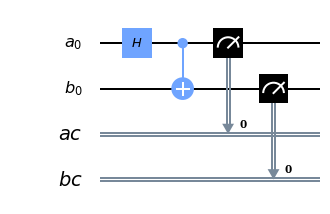

In [57]:
outputstate = result.get_statevector(qc, decimals=3)
print("Output State: ", outputstate, "\n")
normalize_state_Vector(outputstate)
qc.draw(output='mpl')        # draw the circuit

### Print the circle plots for sake of intuition
- Remember: they are binary numbers
- It's either ONE ot THREE.

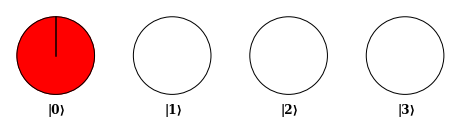

In [58]:
# Print out Circle Notation for intuitions sake

from circle_plot import *
plot_circles(outputstate)

# Developmental Detour : -  <font color="blue">Quantum Teleportation</font>
> **<font color="red">Definition:</font>**  Quantum teleportation is a process in which **quantum information** (e.g. the exact state of an atom or photon) can be transmitted (exactly, in principle) from one location to another, with the help of classical communication and previously shared **quantum entanglement** between the sending and receiving location.
- https://en.wikipedia.org/wiki/Quantum_teleportation

    
![teleportation-bell-jars](img/teleportation-bell-jars.png "teleportation-bell-jars")

> **<font color="red">Notice</font>** Quantum Teleportation is a **fundamental primitive** in **quantum networking and cryptography**, and other types of quantum computing.

    
    
### Background Videos:

#### Quantum entanglement and quantum teleportation? (2 Minutes)
-https://www.youtube.com/watch?v=FwcZk4-tJ4s

#### Teleportation: The Quantum Around You (8+ Minutes)
- https://www.youtube.com/watch?v=A12TT2Jxf8k

#### Explanatory Video (14+ Minutes)
- https://www.youtube.com/watch?v=DxQK1WDYI_k

## Quantum Teleportation Basics

<BR>
    
![Quantum_Teleportation-MITx](img/Quantum_Teleportation-MITx.png "")

<BR><BR>
    
![QC_Advantage-Teleportation](img/QC_Advantage-Teleportation.png "")

<BR><BR>
    
    
![QuantumTeleportationPPTDgm](img/QuantumTeleportationPPTDgm.png "")

<BR>

## <font color="blue">Developmental Detour</font>:- <font color="red">QCEngine</font> Teleportation Program WalkThrough

- It's instructive to experience a Quantum Program / Circuit walkthrough end to end to get the full picture of the process.
- It's detailed and dense, but worth the investment in time.

> ### Complete Teleportation Circuit

![QT_CompleteCircuit](img/QT_CompleteCircuit.png "")

> ### Create an Entangled Pair


![QT-1_EntangledPair](img/QT-1_EntangledPair.png "")



> Since we use three qubits in our teleportation example, their full description needs 2^3 = 8 circles (one for each possible combination of the 3 bits). We’ll arrange these eight circles in two rows, which helps us to visualize how operations affect the three constituent qubits.

> You can check that these labels are correct by considering the **binary value of the register that each circle corresponds to**.

> The first task for teleportation is **establishing an entangled link**. The **HAD** and **CNOT** combination achieving to create the specially named Bell pair entangled state of two qubits. One can see from the circle notation that if we read bob and ep, the values are **50/50 random**, but are **guaranteed to match each other** - **à la entanglement.**

> ### Prepare the Payload

![QT-2_PrepPayload](img/QT-2_PrepPayload.png "")


> Having established an entanglement link, Alice can prepare the payload to be sent. How she prepares it depends, of course, on the nature of the (quantum) information that she wants to send to Bob.

> In this example a **simple payload qubit** is prepared, using only **HAD** and **PHASE** operations. This has the benefit of producing a payload with a readily decipherable circle-notation pattern.

> We can see that **the bob and ep qubits are still dependent on one another** (only the circles corresponding to the bob and ep qubits possessing equal values have nonzero magnitudes). We can also see that **the value of alice is not dependent on either of the other two qubits**, and furthermore that her payload preparation produced a qubit that is 85.4% ∣0⟩ and 14.6% ∣1⟩, with a relative phase of –90° (the circles corresponding to alice=1 are at 90° clockwise of the alice=0 circles, which is negative in our convention).

> ### Link the Payload

![QT-3_LinkPayload](img/QT-3_LinkPayload.png "")

> The conditional nature of the CNOT operation can entangle the states of two qubits. **Alice now uses this fact to entangle her payload qubit with her half of the entangled pair she already shares with Bob**. In terms of circle notation, this action swaps circles around as shown.

> Now that there exist multiple entangled states, there’s the potential for confusion — to be clear: Alice and Bob already each held one of two entangled qubits (produced in step 1). Now **Alice has entangled another (payload) qubit onto her half of this (already entangled) pair**. Intuitively notice that in some sense Alice has, by proxy, **now linked her payload to Bob’s half of the entangled pair** — although her payload qubit is still unchanged. **<font color="red">Any READ operation results on her payload will now be logically linked with those of the other two qubits.</font>**

- **Stretch**: This link can been seen in the circle notation since the QPU register state only contains entries where the XOR of all three qubits is 0. Formerly this was true of ep and bob, but now it is true for all three qubits forming a three-qubit entangled group.


> ### Put the Payload into Superposition

![QT-4_PayloadSuperposition](img/QT-4_PayloadSuperposition.png "")

> To make the link that Alice has created for her payload actually useful, **she needs to finish by performing a <font color="red">HAD operation</font> on her payload**. 
- *If Alice hadn’t applied HAD, she would have **destroyed magnitude and phase information** when applying her READ operations that she will shortly use*. 

- By applying the HAD operation, Alice was able to **maneuver** the state of Bob’s qubit closer to that of her payload.


> Interestingly, the **four potential states** Bob could receive are **all different variations on Alice’s original payload**: 

0. In the first column (where alice=0 and ep=0), we have Alice’s payload, **exactly as she prepared it**.  
0. In the second column, we have the same thing, **except with a PHASE(180) applied**.  
0. In the third column, we see the correct payload, but with a **NOT** having been applied to it **(∣0⟩ and ∣1⟩ are flipped)**.  
0. Finally, the last column is **both phase-shifted and flipped** (i.e., a PHASE(180) followed by a NOT).

> ### Read Both of Alices Qubits

![QT-5_ReadBothAliceQBs](img/QT-5_ReadBothAliceQBs.png "")


> Next, **Alice performs a READ operation on her two qubits** (the payload and her half of the entangled pair she shares with Bob). 
- This READ irrevocably destroys both these qubits. You may wonder why Alice bothers to do this. 
- As it turns out that **the results of this unavoidably destructive READ operation are crucial for the teleportation protocol to work**. <font color="red">Copying quantum states is not possible, even when using entanglement</font>. 
- *The only option to communicate quantum states is to teleport them, and when teleporting, we must destroy the original*.

> Alice performs the *prescribed READ operations on her payload and her half of the entangled pair*. This operation returns **two bits**.

> ### Receive and Transform

![QT-6_ReceiveTransform](img/QT-6_ReceiveTransform.png "")


#### The Two bits of Classical Information
- *State Spin Directions*

> **Bob’s qubit could end up in one of <font color="red">four</font> states** — each of which is simply related to Alice’s payload by HAD and/or PHASE(180) operations. If Bob could learn which of these <font color="red">four</font> **states** he possessed, he could apply the necessary **inverse operations** to convert it back to Alice’s original payload. 

*And the **two bits** Alice has from her **READ** operations are precisely the information that Bob needs!* 

- <font color="red">Note</font>: So at this stage, Alice picks up the <font color="red">phone</font> and transmits two bits of conventional information to Bob.


> Based on which two bits he receives, Bob knows which column from our circle-notation view represents his qubit. 
- If the first bit he receives from Alice is 1, he performs a **NOT** operation on the qubit. 
- Then, if the second bit is 1 he also performs a **PHASE(180)**.


#### This completes the teleportation protocol — Bob now holds a qubit indistinguishable from Alice’s initial payload.

> ### Verify the Result

![QT-7_VerifyResult](img/QT-7_VerifyResult.png "")

<br>

> If Alice and Bob were using this teleportation in serious work, they’d be finished. *Bob would take the teleported qubit from Alice and continue to use it in whatever larger quantum application they were working on.* So long as they trust their QPU hardware, they can rest assured that Bob has the qubit Alice intended.


> **In the cases where we’d like to verify that the hardware has teleported a qubit correctly** - Our only option is to READ Bob’s final qubit. Of course, we can never expect to learn (and therefore verify) the state of his qubit from a **single READ**, but **by repeating the whole teleportation process and doing multiple READ's we can start to build up a picture of Bob’s state**. 

- In fact, the easiest way for us to verify the teleportation protocol’s success on a physical device would be for Bob to run the “prep the payload” steps that Alice performs on a |0> state to create her payload, on his final qubit, only in reverse. 

- If the qubit Bob has truly matches the one Alice sent, this should leave Bob with a |0> state, and if Bob then performs a final verification READ, it should only ever return a 0. 

- *If Bob ever READs this test qubit as nonzero, the teleportation has failed.*

## <font color="red">Exercise:</font> Using **<font color="blue">QCEngine</font>** to Explore Quantum Teleportation

> **NOTICE** - After understanding the basics of Quantum Teleportation, observe how that gets implemented in the circuit.

- Run the program and follow the narrative listed above in the behavior of the circle plots. Observe the different results and step through the circuit to inspect the different stages of the teleportation operation.

In [35]:
# QUIRK (Quantum Curcuit Simulator) 
from IPython.display import IFrame
IFrame(src='https://oreilly-qc.github.io?p=4-1', width=1200, height=600)

## <font color="red">Exercise:</font> Using **<font color="blue">QUIRK</font>** to Explore Quantum Teleportation
- #### Visual Inspection

> **NOTICE** - The "message" gate provides insight into how the teleporting of the state of the qubit occures - follow it through the circuit.

- Match the similar components from the QCEngine's implementation of Teleportation to the QUIRK's implementation.

- Observe how the QUIRK implementation is different and how the teleportation still works.


In [12]:
# QUIRK (Quantum Curcuit Simulator) 
from IPython.display import IFrame
IFrame(src='https://algassert.com/quirk#circuit={%22cols%22:[[1,%22H%22],[1,%22%E2%80%A2%22,1,1,%22X%22],[%22%E2%80%A6%22,%22%E2%80%A6%22],[%22~87lj%22],[%22Bloch%22],[%22%E2%80%A2%22,%22X%22],[%22H%22],[%22Measure%22,%22Measure%22],[%22Bloch%22,%22Bloch%22],[1,%22%E2%80%A2%22,1,1,%22X%22],[%22%E2%80%A2%22,1,1,1,%22Z%22]],%22gates%22:[{%22id%22:%22~87lj%22,%22name%22:%22message%22,%22circuit%22:{%22cols%22:[[%22e^-iYt%22],[%22X^t%22]]}},{%22id%22:%22~f7c0%22,%22name%22:%22received%22,%22matrix%22:%22{{1,0},{0,1}}%22}]}', width=1100, height=700)

## <font color="red">Exercise:</font> Using **<font color="blue">QISKIT</font>** to Explore Quantum Teleportation

> **NOTICE** - Compare this circuit to the corresponding QCEngine circuit and follow the architecture, execution, and resulting curcuit.

- Note the differences in implementation and inspection capabilities.

### Setup the program
- There is randomness inherent in this program, so run it a few times and observe it's behavior.

In [60]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
import math
import numpy as np

## Uncomment the next line to see diagrams when running in a notebook
%matplotlib inline

# Helper Funtion for Normalizing State Vectors
#
def normalize_state_Vector(state_vector):
    print("Normalized Result: ")
    for result in state_vector:
        print(round( np.abs(result)**2, 1) )
           
            
## Example 4-1: Basic Teleportation

# Set up the program

# Quantum Registers
alice = QuantumRegister(1, name='alice')
ep    = QuantumRegister(1, name='ep')
bob   = QuantumRegister(1, name='bob')

# Classical Registers
alice_c = ClassicalRegister(1, name='alicec')
ep_c    = ClassicalRegister(1, name='epc')
bob_c   = ClassicalRegister(1, name='bobc')

# Quantum Circuit
qc = QuantumCircuit(alice, ep, bob, alice_c, ep_c, bob_c)


# entangle the key qubits in the circuit
#
qc.h(ep)
qc.cx(ep, bob)
qc.barrier()


# prep payload
qc.reset(alice)
qc.h(alice)
qc.rz(math.radians(45), alice)
qc.h(alice)
qc.barrier()


# send the state of Allices Qubit
# 
qc.cx(alice, ep)
qc.h(alice)
qc.measure(alice, alice_c)
qc.measure(ep, ep_c)
qc.barrier()


# Bob receives Alices Qubits State
#
qc.x(bob).c_if(ep_c, 1)
qc.z(bob).c_if(alice_c, 1)


# verify the receipt of the state
#
qc.h(bob)
qc.rz(math.radians(-45), bob)
qc.h(bob)
qc.measure(bob, bob_c)


## That's the program. Everything below runs and draws it.

backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()


counts = result.get_counts(qc)
print('counts:',counts)

counts: {'0 1 1': 1}


### Print out StateVector and Circuit Diagram for intuition sake

Output State:  [0.+0.j 0.+0.j 0.+0.j 1.-0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j] 

Normalized Result: 
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0


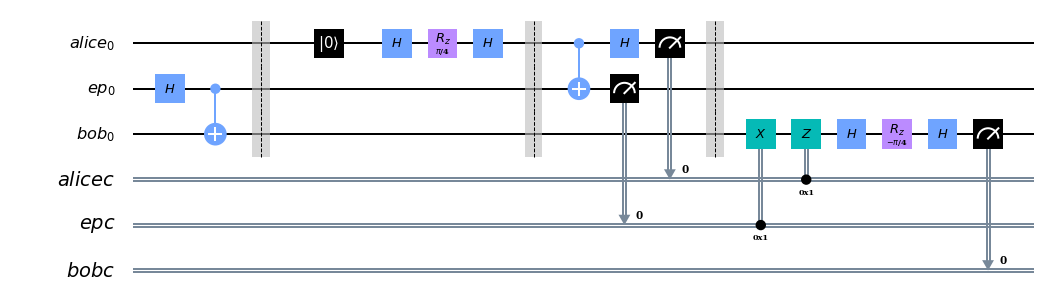

In [61]:
outputstate = result.get_statevector(qc, decimals=3)
print("Output State: ", outputstate, "\n")
normalize_state_Vector(outputstate)
qc.draw(output='mpl')        # draw the circuit

### Print out Circle Plots for intuition sake

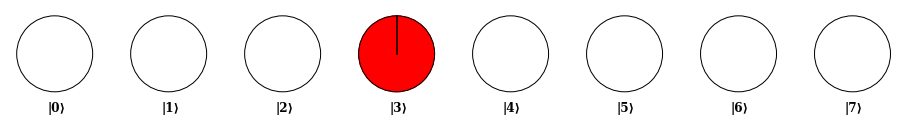

In [62]:
# Print out Circle Notation for intuitions sake

from circle_plot import *
plot_circles(outputstate)

# <font color="red">Graded Exercises</font>  for use <font color="blue">with structured courses.</font>

## QC Concepts 

- Go through the **entire** JNB and complete each of the exercises, including any supplementary Video's - hand in completed <font color="red">**PDF**</font> from this JNB once finished.


- Step through the code for **each** of the above exercises, make sure you can (1) execute it, and (2) know what it does.


- <font color="blue">Complete Challenge Exercises below.</font> **(turn in the JNB)**



> 0. **Level 3 Quirky Puzzles**:  https://uncertain-systems.com/puzzles.html (Interference)
> 0. **Level 4 Quirky (type) Puzzles**:  https://uncertain-systems.com/puzzles.html (Entanglement)




## QUIRKY <font color="red">Interference and Entanglement Problems</font>
- To help build intuition about Interference and Entanglement, solve the following puzzles. 

**<font color="red"> IMPORTANT</font>** - Copy the URL String into a new tab and do you work there, then when finished, copy the completed URL string to the proper cell below for evaluation and grading.


- **Each puzzle starts with a hidden gate** that induces interference or entanglement  - your job is to do the following:


### Interference - Turn the Qubits <font color="red">OFF</font>

In [13]:
# QUIRKey (Quantum Circuit Simulator)
from IPython.display import IFrame
IFrame(src='https://uncertain-systems.com/puzzles/quirk_lvl3.html#circuit={%22cols%22:[[%22H%22,%22H%22],[%22~605h%22],[%22Amps1%22,%22Amps1%22]],%22gates%22:[{%22id%22:%22~4ish%22,%22name%22:%22%F0%9F%A7%9D%F0%9F%8F%BB%22,%22circuit%22:{%22cols%22:[[%22H%22,%22H%22,%22H%22],[%22Z%22,%22Z^%C2%BD%22,%22Z^%C2%BC%22]]}},{%22id%22:%22~er8q%22,%22name%22:%22%F0%9F%91%A9%F0%9F%8F%BE%E2%80%8D%F0%9F%A4%9D%E2%80%8D%F0%9F%91%A9%F0%9F%8F%BB%22,%22circuit%22:{%22cols%22:[[%22H%22,%22H%22,%22H%22],[%22Z^t%22,{%22id%22:%22Z^ft%22,%22arg%22:%222*t%22},{%22id%22:%22Rzft%22,%22arg%22:%22(pi/2)*t%22}]]}},{%22id%22:%22~c9t9%22,%22name%22:%22%F0%9F%A7%96%F0%9F%8F%BB%22,%22circuit%22:{%22cols%22:[[%22Y^t%22,%22X^t%22,%22Y^-t%22]]}},{%22id%22:%22~jgrm%22,%22name%22:%22%F0%9F%91%A9%F0%9F%8F%BE%E2%80%8D%F0%9F%8D%BC%22,%22circuit%22:{%22cols%22:[[{%22id%22:%22Y^ft%22,%22arg%22:%22t/2%22},{%22id%22:%22X^ft%22,%22arg%22:%224*t%22},{%22id%22:%22Ryft%22,%22arg%22:%22pi%20t%22},%22Rxft%22]]}},{%22id%22:%22~da9m%22,%22name%22:%22Gates%20here%22,%22matrix%22:%22{{1,0},{0,1}}%22},{%22id%22:%22~vjrd%22,%22name%22:%22Gates%20Here%22,%22matrix%22:%22{{1,0,0,0},{0,1,0,0},{0,0,1,0},{0,0,0,1}}%22},{%22id%22:%22~605h%22,%22name%22:%22%F0%9F%91%A8%F0%9F%8F%BE%E2%80%8D%F0%9F%94%A7%22,%22circuit%22:{%22cols%22:[[%22Z^%C2%BD%22,%22Z^%C2%BC%22]]}}]}', width=900, height=600)

### Copy your completed QUIRK URL string in the cell below.

It'll be of the following form: 

https://algassert.com/quirk#circuit={%22cols%22:[[%22~bhpb%22]],%22gates%22:[{%22id%22:%22~bhpb%22,%22name%22:%22Problem-#2%22,%22circuit%22:{%22cols%22:[[%22H%22,%22H%22,%22H%22],[%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22]]}}]}



#### Your COMPLETED QUIRK URL String Goes under here:


<BR><BR><BR>
.

In [13]:
# QUIRKey (Quantum Circuit Simulator)
from IPython.display import IFrame
IFrame(src='https://uncertain-systems.com/puzzles/quirk_lvl3.html#circuit={%22cols%22:[[%22~2atg%22],[%22Amps1%22]],%22gates%22:[{%22id%22:%22~4ish%22,%22name%22:%22%F0%9F%A7%9D%F0%9F%8F%BB%22,%22circuit%22:{%22cols%22:[[%22H%22,%22H%22,%22H%22],[%22Z%22,%22Z^%C2%BD%22,%22Z^%C2%BC%22]]}},{%22id%22:%22~er8q%22,%22name%22:%22%F0%9F%91%A9%F0%9F%8F%BE%E2%80%8D%F0%9F%A4%9D%E2%80%8D%F0%9F%91%A9%F0%9F%8F%BB%22,%22circuit%22:{%22cols%22:[[%22H%22,%22H%22,%22H%22],[%22Z^t%22,{%22id%22:%22Z^ft%22,%22arg%22:%222*t%22},{%22id%22:%22Rzft%22,%22arg%22:%22(pi/2)*t%22}]]}},{%22id%22:%22~c9t9%22,%22name%22:%22%F0%9F%A7%96%F0%9F%8F%BB%22,%22circuit%22:{%22cols%22:[[%22Y^t%22,%22X^t%22,%22Y^-t%22]]}},{%22id%22:%22~jgrm%22,%22name%22:%22%F0%9F%91%A9%F0%9F%8F%BE%E2%80%8D%F0%9F%8D%BC%22,%22circuit%22:{%22cols%22:[[{%22id%22:%22Y^ft%22,%22arg%22:%22t/2%22},{%22id%22:%22X^ft%22,%22arg%22:%224*t%22},{%22id%22:%22Ryft%22,%22arg%22:%22pi%20t%22},%22Rxft%22]]}},{%22id%22:%22~da9m%22,%22name%22:%22Gates%20here%22,%22matrix%22:%22{{1,0},{0,1}}%22},{%22id%22:%22~vjrd%22,%22name%22:%22Gates%20Here%22,%22matrix%22:%22{{1,0,0,0},{0,1,0,0},{0,0,1,0},{0,0,0,1}}%22},{%22id%22:%22~605h%22,%22name%22:%22%F0%9F%91%A8%F0%9F%8F%BE%E2%80%8D%F0%9F%94%A7%22,%22circuit%22:{%22cols%22:[[%22Z^%C2%BD%22,%22Z^%C2%BC%22]]}},{%22id%22:%22~lgtk%22,%22name%22:%22%F0%9F%91%8B%F0%9F%8F%BC%22,%22circuit%22:{%22cols%22:[[%22Y^%C2%BC%22,%22Y^%C2%BC%22,{%22id%22:%22X^ft%22,%22arg%22:%221/8%22},{%22id%22:%22X^ft%22,%22arg%22:%221/3%22}],[1,%22Z^%C2%BD%22,%22Z^-%C2%BD%22,%22Z^%C2%BC%22]]}},{%22id%22:%22~2atg%22,%22name%22:%22%E2%9D%95%22,%22circuit%22:{%22cols%22:[[{%22id%22:%22X^ft%22,%22arg%22:%221/8%22}],[%22Z^-%C2%BD%22]]}}]}', width=900, height=600)

### Copy your completed QUIRK URL string in the cell below.

It'll be of the following form: 

https://algassert.com/quirk#circuit={%22cols%22:[[%22~bhpb%22]],%22gates%22:[{%22id%22:%22~bhpb%22,%22name%22:%22Problem-#2%22,%22circuit%22:{%22cols%22:[[%22H%22,%22H%22,%22H%22],[%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22]]}}]}



#### Your COMPLETED QUIRK URL String Goes under here:


<BR><BR><BR>
.

### Entanglement - Turn the Qubits <font color="red">OFF</font>

In [14]:
# QUIRK (Quantum Circuit Simulator)
from IPython.display import IFrame
IFrame(src='https://algassert.com/quirk#circuit={%22cols%22:[[%22~f0hg%22]],%22gates%22:[{%22id%22:%22~f0hg%22,%22name%22:%22Puzzle-#1%22,%22circuit%22:{%22cols%22:[[%22H%22],[%22%E2%80%A2%22,%22X%22]]}}]}', width=900, height=600)

### Copy your completed QUIRK URL string in the cell below.

It'll be of the following form: 

https://algassert.com/quirk#circuit={%22cols%22:[[%22~bhpb%22]],%22gates%22:[{%22id%22:%22~bhpb%22,%22name%22:%22Problem-#2%22,%22circuit%22:{%22cols%22:[[%22H%22,%22H%22,%22H%22],[%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22]]}}]}



#### Your COMPLETED QUIRK URL String Goes under here:


<BR><BR><BR>
.

In [15]:
# QUIRK (Quantum Circuit Simulator)
from IPython.display import IFrame
IFrame(src='https://algassert.com/quirk#circuit={%22cols%22:[[%22~vpbl%22]],%22gates%22:[{%22id%22:%22~vpbl%22,%22name%22:%22Puzzle-#2%22,%22circuit%22:{%22cols%22:[[%22H%22],[%22%E2%80%A2%22,1,%22X%22]]}}]}', width=900, height=600)

### Copy your completed QUIRK URL string in the cell below.

It'll be of the following form: 

https://algassert.com/quirk#circuit={%22cols%22:[[%22~bhpb%22]],%22gates%22:[{%22id%22:%22~bhpb%22,%22name%22:%22Problem-#2%22,%22circuit%22:{%22cols%22:[[%22H%22,%22H%22,%22H%22],[%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22]]}}]}



#### Your COMPLETED QUIRK URL String Goes under here:


<BR><BR><BR>
.

![the-end](img/the-end.png "the-end")